# Transmisor 
- Proyecto Señales Electricas - Año 2025
- Autor: Uberti, Ulises Leandro
- Codigo Fuente de Transmisor.ipynb

In [40]:
#Importamos las librerias
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#import wave
#Subimos de nivel la carpeta par importar las funciones de otros archivos 
import sys 
sys.path.append("..")

In [41]:
#Tendremos el archivo .wav, obtendremos sus caracterisiticas 
from modules.caracteristicas import Audio_Caracteristicas
ruta = "../datos/audio_prueba.wav"
Audio_Caracteristicas(ruta) 

Canales: 1
Bits por muestra: 16
Frecuencia de muestreo: 24000 Hz
Duración: 4.66 segundos


(1, 16, 24000, 111744, 4.656)

# Archivo .wav
Sabemos que se trata de un archivo de audio con formato RIFF (Formato de Intercambio de Recursos)
En distintos "chunks" (bloques) almacena distintos tipos de datos, uno de estos contiene las caracterisiticas 
- Cantidad de canales 
- Bits por muestra
- Frecuencia de Muestreo 
- Duracion del Audio

Obtenemos:
16 bits por muestra y 1 canal (mono) --> Señal digital multinivel 
Obtenemos la frecuencia de muestreo 
Tenemos una señal cuantificada, restaria codificarla 
#tenemos M niveles con M = 2^16

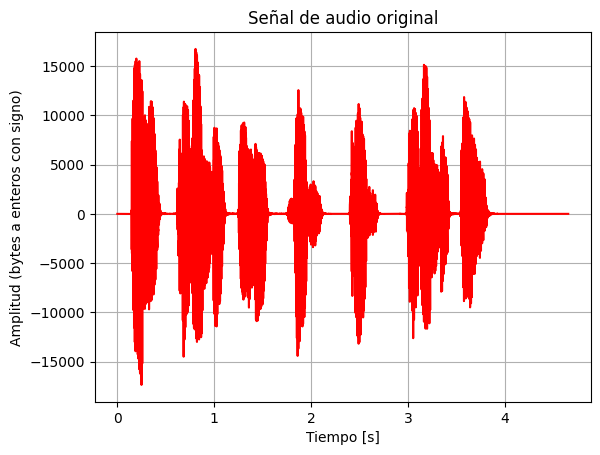

<Figure size 13500x2000 with 0 Axes>

In [42]:
# usamos la funcion del archivo caracterisiticas.py
from importlib import reload
import modules.caracteristicas
reload(modules.caracteristicas)
from modules.caracteristicas import Audio_Grafica
#graficamos la señal
Audio_Grafica(ruta)
